# Breast Cancer Coimbra Dataset

This work is a series of different classification models to predict Breast cancer. The goal is to predict whether the patient has or not Breast cancer, by using a specific subset of predictors.

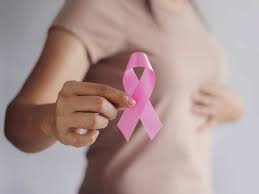

This dataset was provided by **[Patricio, 2018] Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1)** and it's available at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import time

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import power_transform, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt

def custom_describe(dataset):
    df = dataset.drop(columns=['Classification']).describe().T
    df = df.drop(columns=['count'])
    df['skewness'] = dataset.drop(columns=['Classification']).skew(axis=0).values
    df['maxmin_ratio'] = df['max']/df['min']
    return df

## Loading data and applying pre-processing

In [101]:
dataset = pd.read_csv('dataR2.csv')
dataset.head()

y = dataset['Classification'].values

In [102]:
df = custom_describe(dataset)
df = df[df.maxmin_ratio > 20]
columns = df.index.values

df = dataset

for item in columns:
    df[item] = power_transform(df[item].values.reshape(-1,1), method='box-cox').reshape(1,-1)[0]
    

df = df.drop(columns=['Classification'])

scaler = StandardScaler()
scaler.fit(df)
data = scaler.transform(df)

for i, col in enumerate(df.columns):
    df[col] = data[:,i]

# X = df

In [103]:
pca = PCA(n_components=8)
pca.fit(df)
transformed_df = pd.DataFrame(pca.transform(df))
# transformed_df['Classification'] = dataset['Classification']
transformed_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']
X = transformed_df

In [104]:
X.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.294871,-0.811219,-0.238494,-0.147788,0.014042,-0.032585,0.268417,0.003696
1,-2.417155,0.181783,2.208034,-0.641699,0.206245,-0.893450,0.512064,-0.494591
2,-1.243299,0.549455,0.809330,0.223064,1.769790,-0.041213,-0.941756,-0.322523
3,-2.199797,-1.541933,1.056558,0.362750,0.467576,-0.502859,-0.339391,-0.600187
4,-1.747297,-1.055380,2.533360,0.208237,0.196436,-0.704598,-0.234580,-0.186973


## Linear models

### Ordinary Logistic Regression

In [105]:
k = 10
print(f"\n# {k}-FOLD CV PERFORMANCE #")

kf = KFold(n_splits=k)

lr_kf_acc = []
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = LogisticRegression().fit(X_train, y_train)
    
    test_acc = round(accuracy_score(y_test, reg.predict(X_test)), 3)
    
    print(f"\n  FOLD-{i}")
    print(f"   Test Accuracy: {test_acc}")
    
    lr_kf_acc.append(test_acc)
    i+=1
    
print(f'''
Summary:
  {k}-fold Average Accuracy: {np.mean(lr_kf_acc)}
''')


# 10-FOLD CV PERFORMANCE #

  FOLD-1
   Test Accuracy: 0.25

  FOLD-2
   Test Accuracy: 0.333

  FOLD-3
   Test Accuracy: 0.333

  FOLD-4
   Test Accuracy: 0.667

  FOLD-5
   Test Accuracy: 0.917

  FOLD-6
   Test Accuracy: 0.75

  FOLD-7
   Test Accuracy: 0.545

  FOLD-8
   Test Accuracy: 0.818

  FOLD-9
   Test Accuracy: 0.455

  FOLD-10
   Test Accuracy: 0.182

Summary:
  10-fold Average Accuracy: 0.5250000000000001



### Linear Discriminant Analysis

In [93]:
k = 10
print(f"\n# {k}-FOLD CV PERFORMANCE #")

kf = KFold(n_splits=k)

lr_kf_acc = []
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = LinearDiscriminantAnalysis().fit(X_train, y_train)
    
    test_acc = round(accuracy_score(y_test, reg.predict(X_test)), 3)
    
    print(f"\n  FOLD-{i}")
    print(f"   Test Accuracy: {test_acc}")
    
    lr_kf_acc.append(test_acc)
    i+=1
    
print(f'''
Summary:
  {k}-fold Average Accuracy: {np.mean(lr_kf_acc)}
''')


# 10-FOLD CV PERFORMANCE #

  FOLD-1
   Test Accuracy: 0.167

  FOLD-2
   Test Accuracy: 0.167

  FOLD-3
   Test Accuracy: 0.25

  FOLD-4
   Test Accuracy: 0.667

  FOLD-5
   Test Accuracy: 0.75

  FOLD-6
   Test Accuracy: 0.667

  FOLD-7
   Test Accuracy: 0.636

  FOLD-8
   Test Accuracy: 0.727

  FOLD-9
   Test Accuracy: 0.455

  FOLD-10
   Test Accuracy: 0.091

Summary:
  10-fold Average Accuracy: 0.4577000000000001



## Non-linear models

### K-nearest neighbors (KNN)

In [94]:
k = 10
print(f"\n# {k}-FOLD CV PERFORMANCE #")

kf = KFold(n_splits=k)

lr_kf_acc = []
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
    
    test_acc = round(accuracy_score(y_test, reg.predict(X_test)), 3)
    
    print(f"\n  FOLD-{i}")
    print(f"   Test Accuracy: {test_acc}")
    
    lr_kf_acc.append(test_acc)
    i+=1
    
print(f'''
Summary:
  {k}-fold Average Accuracy: {np.mean(lr_kf_acc)}
''')


# 10-FOLD CV PERFORMANCE #

  FOLD-1
   Test Accuracy: 0.583

  FOLD-2
   Test Accuracy: 0.75

  FOLD-3
   Test Accuracy: 0.667

  FOLD-4
   Test Accuracy: 0.833

  FOLD-5
   Test Accuracy: 0.833

  FOLD-6
   Test Accuracy: 0.5

  FOLD-7
   Test Accuracy: 0.455

  FOLD-8
   Test Accuracy: 0.636

  FOLD-9
   Test Accuracy: 0.364

  FOLD-10
   Test Accuracy: 0.0

Summary:
  10-fold Average Accuracy: 0.5620999999999999



### Quadratic Discriminant Analysis (QDA)

In [95]:
k = 10
print(f"\n# {k}-FOLD CV PERFORMANCE #")

kf = KFold(n_splits=k)

lr_kf_acc = []
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
    
    test_acc = round(accuracy_score(y_test, reg.predict(X_test)), 3)
    
    print(f"\n  FOLD-{i}")
    print(f"   Test Accuracy: {test_acc}")
    
    lr_kf_acc.append(test_acc)
    i+=1
    
print(f'''
Summary:
  {k}-fold Average Accuracy: {np.mean(lr_kf_acc)}
''')


# 10-FOLD CV PERFORMANCE #

  FOLD-1
   Test Accuracy: 0.5

  FOLD-2
   Test Accuracy: 0.5

  FOLD-3
   Test Accuracy: 0.417

  FOLD-4
   Test Accuracy: 0.583

  FOLD-5
   Test Accuracy: 0.833

  FOLD-6
   Test Accuracy: 0.583

  FOLD-7
   Test Accuracy: 0.636

  FOLD-8
   Test Accuracy: 0.727

  FOLD-9
   Test Accuracy: 0.364

  FOLD-10
   Test Accuracy: 0.364

Summary:
  10-fold Average Accuracy: 0.5507



### Support Vector Machine (SVM)

#### Kernel: Linear

In [96]:
k = 10
print(f"\n# {k}-FOLD CV PERFORMANCE #")

kf = KFold(n_splits=k)

lr_kf_acc = []
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = SVC(C=1.0, kernel='linear').fit(X_train, y_train)
    
    test_acc = round(accuracy_score(y_test, reg.predict(X_test)), 3)
    
    print(f"\n  FOLD-{i}")
    print(f"   Test Accuracy: {test_acc}")
    
    lr_kf_acc.append(test_acc)
    i+=1
    
print(f'''
Summary:
  {k}-fold Average Accuracy: {np.mean(lr_kf_acc)}
''')


# 10-FOLD CV PERFORMANCE #

  FOLD-1
   Test Accuracy: 0.25

  FOLD-2
   Test Accuracy: 0.333

  FOLD-3
   Test Accuracy: 0.25

  FOLD-4
   Test Accuracy: 0.667

  FOLD-5
   Test Accuracy: 0.917

  FOLD-6
   Test Accuracy: 0.75

  FOLD-7
   Test Accuracy: 0.545

  FOLD-8
   Test Accuracy: 0.636

  FOLD-9
   Test Accuracy: 0.455

  FOLD-10
   Test Accuracy: 0.091

Summary:
  10-fold Average Accuracy: 0.4894



#### Kernel: Polynomial

In [97]:
k = 10
print(f"\n# {k}-FOLD CV PERFORMANCE #")

kf = KFold(n_splits=k)

lr_kf_acc = []
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = SVC(C=1.0, kernel='poly', degree=2).fit(X_train, y_train)
    
    test_acc = round(accuracy_score(y_test, reg.predict(X_test)), 3)
    
    print(f"\n  FOLD-{i}")
    print(f"   Test Accuracy: {test_acc}")
    
    lr_kf_acc.append(test_acc)
    i+=1
    
print(f'''
Summary:
  {k}-fold Average Accuracy: {np.mean(lr_kf_acc)}
''')


# 10-FOLD CV PERFORMANCE #

  FOLD-1
   Test Accuracy: 0.417

  FOLD-2
   Test Accuracy: 0.167

  FOLD-3
   Test Accuracy: 0.167

  FOLD-4
   Test Accuracy: 0.083

  FOLD-5
   Test Accuracy: 0.667

  FOLD-6
   Test Accuracy: 0.5

  FOLD-7
   Test Accuracy: 0.636

  FOLD-8
   Test Accuracy: 0.455

  FOLD-9
   Test Accuracy: 0.455

  FOLD-10
   Test Accuracy: 0.455

Summary:
  10-fold Average Accuracy: 0.4002



#### Kernel: RBF

In [106]:
k = 10
print(f"\n# {k}-FOLD CV PERFORMANCE #")

kf = KFold(n_splits=k)

lr_kf_acc = []
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = SVC(C=1.9, kernel='rbf').fit(X_train, y_train)
    
    test_acc = round(accuracy_score(y_test, reg.predict(X_test)), 3)
    
    print(f"\n  FOLD-{i}")
    print(f"   Test Accuracy: {test_acc}")
    
    lr_kf_acc.append(test_acc)
    i+=1
    
print(f'''
Summary:
  {k}-fold Average Accuracy: {np.mean(lr_kf_acc)}
''')


# 10-FOLD CV PERFORMANCE #

  FOLD-1
   Test Accuracy: 0.25

  FOLD-2
   Test Accuracy: 0.5

  FOLD-3
   Test Accuracy: 0.5

  FOLD-4
   Test Accuracy: 0.417

  FOLD-5
   Test Accuracy: 0.75

  FOLD-6
   Test Accuracy: 0.75

  FOLD-7
   Test Accuracy: 0.545

  FOLD-8
   Test Accuracy: 0.818

  FOLD-9
   Test Accuracy: 0.364

  FOLD-10
   Test Accuracy: 0.0

Summary:
  10-fold Average Accuracy: 0.4894



### Neural Network

In [107]:
k = 10
print(f"\n# {k}-FOLD CV PERFORMANCE #")

kf = KFold(n_splits=k)

lr_kf_acc = []
i = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = MLPClassifier(random_state=1, max_iter=2000, 
                    activation='relu', hidden_layer_sizes=(50, 30)).fit(X_train, y_train)
    
    test_acc = round(accuracy_score(y_test, reg.predict(X_test)), 3)
    
    print(f"\n  FOLD-{i}")
    print(f"   Test Accuracy: {test_acc}")
    
    lr_kf_acc.append(test_acc)
    i+=1
    
print(f'''
Summary:
  {k}-fold Average Accuracy: {np.mean(lr_kf_acc)}
''')


# 10-FOLD CV PERFORMANCE #

  FOLD-1
   Test Accuracy: 0.333

  FOLD-2
   Test Accuracy: 0.5

  FOLD-3
   Test Accuracy: 0.417

  FOLD-4
   Test Accuracy: 0.75

  FOLD-5
   Test Accuracy: 0.75

  FOLD-6
   Test Accuracy: 0.833

  FOLD-7
   Test Accuracy: 0.818

  FOLD-8
   Test Accuracy: 0.727

  FOLD-9
   Test Accuracy: 0.455

  FOLD-10
   Test Accuracy: 0.364

Summary:
  10-fold Average Accuracy: 0.5947

